In [1]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn import preprocessing

In [11]:
# load data
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
train_data.shape

(1460, 81)

In [13]:
train_data.duplicated(subset='Id').sum()

0

In [14]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
train_data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [16]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
test_data.shape

(1459, 80)

In [18]:
test_data.duplicated(subset='Id').sum()

0

In [19]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [20]:
test_data.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [21]:
# check for missing data in columns
train_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

In [22]:
test_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

PoolQC          99.726027
MiscFeature     96.438356
Alley           92.602740
Fence           80.068493
FireplaceQu     50.000000
LotFrontage     15.547945
GarageYrBlt      5.342466
GarageQual       5.342466
GarageFinish     5.342466
GarageCond       5.342466
dtype: float64

In [27]:
# we drop irrelivant columns
train_data.drop(["PoolQC", "MiscFeature","Alley","Fence","FireplaceQu"], axis = 1, inplace = True)

In [28]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [29]:
test_data.drop(["PoolQC", "MiscFeature","Alley","Fence","FireplaceQu"], axis = 1, inplace = True)

In [30]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [32]:
#encoding category features
oe = preprocessing.OrdinalEncoder()

# Train Categories Encoding
train_categorical_features = train_data.select_dtypes(include=['object']).columns
train_numerical_features= train_data.select_dtypes([np.int64,np.float64]).columns

train_data[train_categorical_features]=oe.fit_transform(train_data[train_categorical_features])

# Test Categories Encoding
test_categorical_features = test_data.select_dtypes(include=['object']).columns
test_numerical_features= test_data.select_dtypes([np.int64,np.float64]).columns

test_data[test_categorical_features]=oe.fit_transform(test_data[test_categorical_features])

In [34]:
test_data.isnull().sum().sort_values(ascending=False).head(15) / len(test_data) *100

LotFrontage     15.558602
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
Utilities        0.137080
dtype: float64

In [35]:
train_data[train_numerical_features]=train_data[train_numerical_features].fillna(train_data[train_numerical_features].median())

for feature in train_categorical_features:
    train_data[feature].interpolate(method ='linear', limit_direction ='forward', inplace=True)
    train_data[feature].interpolate(method ='linear', limit_direction ='backward',inplace=True)
train_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

In [36]:
test_data[test_numerical_features]=test_data[test_numerical_features].fillna(test_data[test_numerical_features].median())

for feature in test_categorical_features:
    test_data[feature].interpolate(method ='linear', limit_direction ='forward', inplace=True)
    test_data[feature].interpolate(method ='linear', limit_direction ='backward',inplace=True)

test_data.isnull().sum().sort_values(ascending=False).head(15) / len(test_data) *100

Id              0.0
GarageType      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
dtype: float64

In [38]:
corr_with=train_data.corrwith(train_data["SalePrice"]).sort_values(ascending=False)
print(corr_with[corr_with>0].head(20),"\n-------------------------")

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
dtype: float64 
-------------------------


In [39]:
print(corr_with[corr_with<0].tail(20))

LowQualFinSF    -0.025606
YrSold          -0.028923
BsmtFinType1    -0.053794
SaleType        -0.054911
LotConfig       -0.067396
OverallCond     -0.077856
MSSubClass      -0.084284
BldgType        -0.085591
Heating         -0.098812
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
MSZoning        -0.166872
LotShape        -0.255580
BsmtExposure    -0.295407
GarageType      -0.302105
HeatingQC       -0.400178
GarageFinish    -0.482754
KitchenQual     -0.589189
BsmtQual        -0.594945
ExterQual       -0.636884
dtype: float64


<AxesSubplot:>

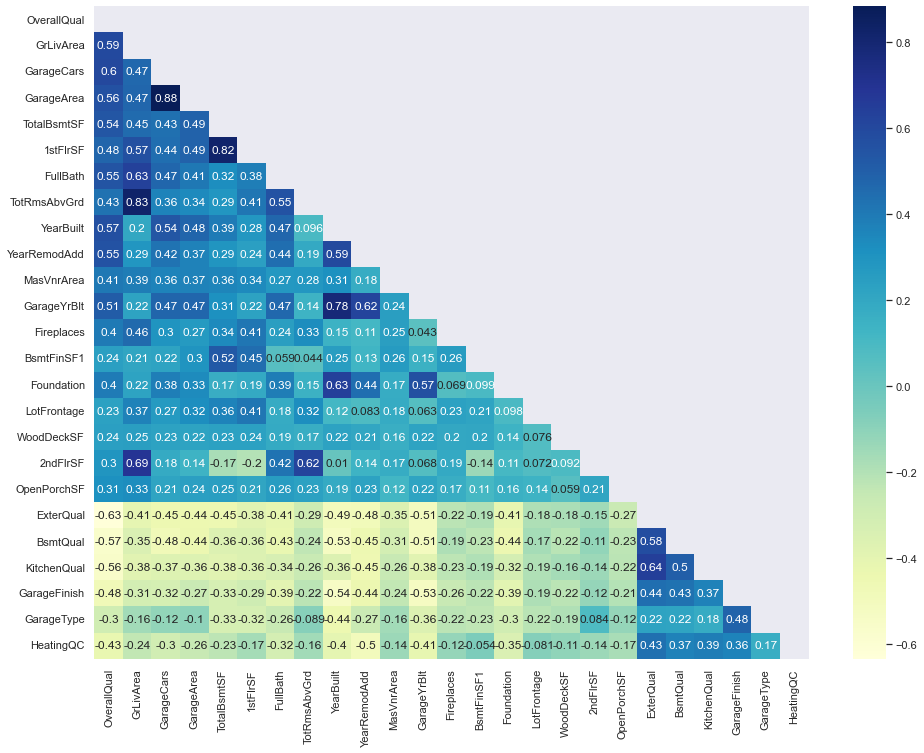

In [40]:
list_of_columns =["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF",
                  "1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd",
                  "MasVnrArea","GarageYrBlt","Fireplaces","BsmtFinSF1","Foundation",
                  "LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF",
                  "ExterQual","BsmtQual","KitchenQual","GarageFinish","GarageType","HeatingQC"]


X = train_data[list_of_columns]
y = train_data.SalePrice
corr = X.corr()
sns.set(rc = {'figure.figsize':(16,12)})
sns.heatmap(corr,mask=((np.triu(np.ones_like(corr)))),cmap="YlGnBu",annot=True)

<AxesSubplot:>

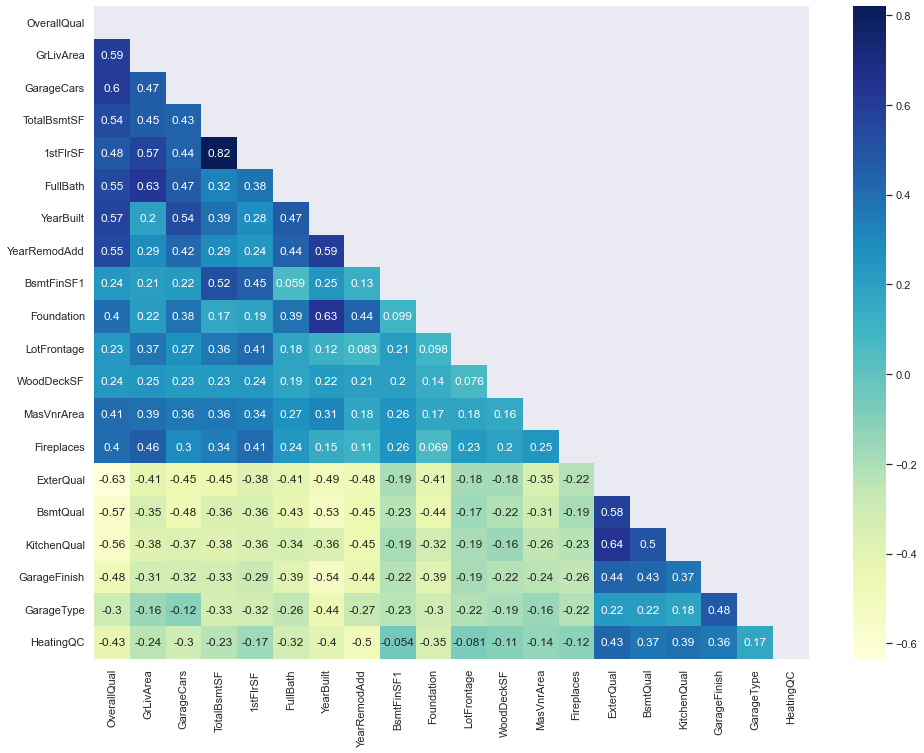

In [41]:
list_of_columns =["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","1stFlrSF",
                  "FullBath","YearBuilt","YearRemodAdd","BsmtFinSF1","Foundation",
                  "LotFrontage","WoodDeckSF","MasVnrArea","Fireplaces",
                  "ExterQual","BsmtQual","KitchenQual","GarageFinish","GarageType","HeatingQC"]

X = train_data[list_of_columns]
y = train_data.SalePrice
corr = X.corr()
sns.set(rc = {'figure.figsize':(16,12)})
sns.heatmap(corr,mask=((np.triu(np.ones_like(corr)))),cmap="YlGnBu",annot=True)

In [45]:
scalar =preprocessing.StandardScaler()
X_scaled=pd.DataFrame(scalar.fit_transform(X),columns = X.columns)
y = train_data.SalePrice               
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
                                                  test_size=0.08,
                                                 random_state = 42)
print('train:', len(X_train), 'validation:', len(X_val))

train: 1343 validation: 117


In [46]:
# Linear Regression

In [47]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

def export_Submission_file(predicition_dataframe,output_file_name):
    Output = pd.DataFrame()
    Output['Id'] = predicition_dataframe['Id']
    Output['SalePrice'] = predicition_dataframe['y_pred']
    Output.to_csv("../"+output_file_name+".txt", index=False)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_train)
y= y_train.ravel()
y_pred=y_pred.ravel()
y_pred =abs(y_pred)

print("Root-Mean-Squared-Error :",compute_rmsle(y,y_pred,4))
print("R2 :",metrics.r2_score(y_train,y_pred))

Root-Mean-Squared-Error : 0.1673
R2 : 0.8109600550878038
